# Influence of the Group Delay Initialization in O-mode

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
sys.path.append('../reflib/')
from reflib import *

## Define a non-initialized group delay

In [9]:
fstart = 16e9
fstop = 50e9
gdelpts = 128

## L-mode

L-mode group delays usually have parabolic shape, reflecting the absence of a pedestal. The probing waves are reflected at layers further in, meaning they can propagate longer distances. This also means higher measured values of the group delay itself. A simulated L-mode group delay, typical for AUG, can be seen next.

(0, 4.249660022217527e-09)

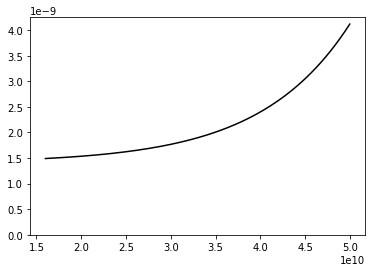

In [10]:
fpro = np.linspace(fstart, fstop, gdelpts, endpoint=True)
simulgd = (np.exp(fpro/1e10-4)+1.4)*1e-9
plt.plot(fpro, simulgd, color='k')
plt.ylim(bottom=0)

### Profile Reconstruction for different Initializations
The standard initialization for AUG's group delays is a linear one, going from the initial measured value down to zero. 

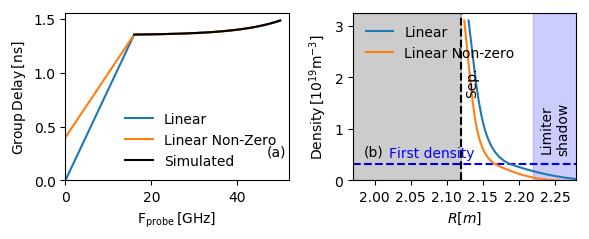

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6,2.5),dpi=100)
####
##Group delays
####
init_pts = 32
#Init frequencies
init_fpro = np.linspace(0, min(fpro), init_pts)
ifpro = np.concatenate((init_fpro, fpro))
#Linear at 0
lin_gd = np.linspace(0.0, min(simulgd), init_pts)
lin_igd = np.concatenate((lin_gd, simulgd))
#Linear at non-zero
lin_gdnz = np.linspace(0.4e-9, min(simulgd), init_pts)
lin_igdnz = np.concatenate((lin_gdnz, simulgd))
#Parabolic Up at 0
par_gd_up = min(simulgd)*(init_fpro/max(init_fpro))**2

#Parabolic Down at 0
par_gd_up = min(simulgd)*(init_fpro/max(init_fpro))**2
par_gd_dn = lin_gd + (lin_gd-par_gd_up)
par_igd = np.concatenate((par_gd_dn, simulgd))



ax[0].text(0.9, 0.15, '(a)', transform=ax[0].transAxes)
ax[0].plot(ifpro*1e-9, lin_igd*1e9, label='Linear')
ax[0].plot(ifpro*1e-9, lin_igdnz*1e9, label='Linear Non-Zero')
#ax[0].plot(ifpro*1e-9, par_igd*1e9, label='Parabolic')
ax[0].plot(fpro*1e-9, simulgd*1e9, label='Simulated', color='k')
ax[0].plot(fpro, simulgd)
ax[0].set_xlim(0,52)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('$\mathrm{F_{probe}\,[GHz]}$')
ax[0].set_ylabel('$\mathrm{Group\,Delay\,[ns]}$')
ax[0].legend(frameon=False)

####
##Profiles
####
rstart = 2.32
r, d, a, b = CalcInvPerfO(ifpro, lin_igd)
plt.plot(rstart - r, d*1e-19, label='Linear')
r, d, a, b = CalcInvPerfO(ifpro, lin_igdnz)
plt.plot(rstart - r, d*1e-19, label='Linear Non-zero')
r, d, a, b = CalcInvPerfO(ifpro, par_igd)
#ax[1].plot(rstart - r, d*1e-19, label='Parabolic')

ax[1].axhline(f2n(fstart)*1e-19,ls='--', color='b', zorder=-10)
ax[1].text(2.02, 0.45, 'First density', color='b')
ax[1].text(0.05, 0.15, '(b)', transform=ax[1].transAxes)
ax[1].axvline(2.12, ls='--', color='k')
ax[1].legend(frameon=False)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('$R[m]$')
ax[1].set_ylabel('$\mathrm{Density\,[10^{19}m^{-3}]}$')
ax[1].set_xticks([2.0,2.05,2.1,2.15,2.2, 2.25])
ax[1].set_xlim(1.97, 2.28)
ax[1].axvspan(1.6, 2.12, alpha=0.2, color='k')
ax[1].axvspan(2.22, 2.3, alpha=0.2, color='b')
ax[1].text(2.25, 1.0, 'Limiter\nshadow', rotation=90, horizontalalignment='center')
ax[1].text(2.125, 2.0, 'Sep.', rotation=90)

plt.tight_layout()
plt.savefig('figures/Lmodeinit.png', dpi=300)

## H-mode
Due to the presence of the pedestal, inter-ELM H-mode group delays tend to be flatter, with less features. 

(0, 1.491876218351313e-09)

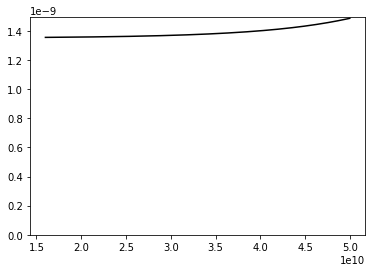

In [12]:
fpro = np.linspace(fstart, fstop, gdelpts, endpoint=True)
simulgd = (np.exp(fpro/1e10-7)+1.35)*1e-9
plt.plot(fpro, simulgd, color='k')
plt.ylim(bottom=0)

### Different Initializations and Profile reconstruction

ValueError: too many values to unpack (expected 2)

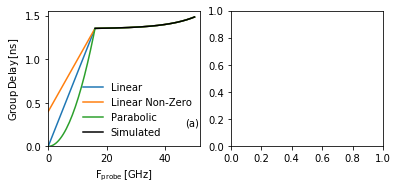

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6,2.5))
####
##Group delays
####
init_pts = 32
#Init frequencies
init_fpro = np.linspace(0, min(fpro), init_pts)
ifpro = np.concatenate((init_fpro, fpro))
#Linear at 0
lin_gd = np.linspace(0.0, min(simulgd), init_pts)
lin_igd = np.concatenate((lin_gd, simulgd))
#Linear at non-zero
lin_gdnz = np.linspace(0.4e-9, min(simulgd), init_pts)
lin_igdnz = np.concatenate((lin_gdnz, simulgd))
#Parabolic at 0
par_gd = min(simulgd)*(init_fpro/max(init_fpro))**2
par_igd = np.concatenate((par_gd, simulgd))

ax[0].text(0.9, 0.15, '(a)', transform=ax[0].transAxes)
ax[0].plot(ifpro*1e-9, lin_igd*1e9, label='Linear')
ax[0].plot(ifpro*1e-9, lin_igdnz*1e9, label='Linear Non-Zero')
ax[0].plot(ifpro*1e-9, par_igd*1e9, label='Parabolic')
ax[0].plot(fpro*1e-9, simulgd*1e9, label='Simulated', color='k')
ax[0].plot(fpro, simulgd)
ax[0].set_xlim(0,52)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('$\mathrm{F_{probe}\,[GHz]}$')
ax[0].set_ylabel('$\mathrm{Group\,Delay\,[ns]}$')
ax[0].legend(frameon=False)

####
##Profiles
####
rstart = 2.32
r, d = CalcInvPerfO(ifpro, lin_igd)
plt.plot(rstart - r, d*1e-19, label='Linear')
r, d = CalcInvPerfO(ifpro, lin_igdnz)
plt.plot(rstart - r, d*1e-19, label='Linear\nNon-zero')
r, d = CalcInvPerfO(ifpro, par_igd)
ax[1].plot(rstart - r, d*1e-19, label='Parabolic')

ax[1].text(0.05, 0.15, '(b)', transform=ax[1].transAxes)
ax[1].axvline(2.145, ls='--', color='k')
ax[1].legend(frameon=False)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('$\mathrm{R\,[m]}$')
ax[1].set_ylabel('$\mathrm{Density\,[10^{19}m^{-3}]}$')
ax[1].set_xticks([2.0,2.05,2.1,2.15,2.2, 2.25])
ax[1].set_xlim(1.97, 2.28)
ax[1].axvspan(1.6, 2.145, alpha=0.2, color='k')
ax[1].axvspan(2.22, 2.3, alpha=0.2, color='b')
ax[1].text(2.25, 1.0, 'Limiter\nshadow', rotation=90, horizontalalignment='center')
ax[1].text(2.12, 0.4, 'Sep.', rotation=90)

plt.tight_layout()
plt.savefig('figures/Hmodeinit.png', dpi=300)

## Different Initialization for H-mode

In [20]:
print(1e-9*3e8/2*1e2)*0.4
print(3.5e-9*3e8/2*1e2)

6.0
52.5


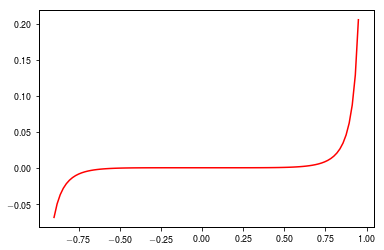

In [67]:
xx = np.linspace(-0.9,0.95,100)
plt.plot(xx, (np.arctanh(xx)**5)/1e2)

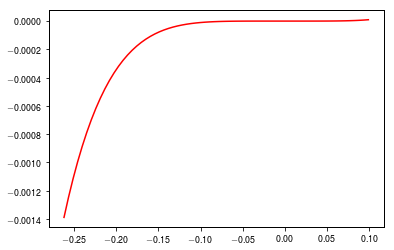

In [72]:
reafpro = (fpro-min(fpro))/max(fpro)
reafpro=reafpro-max(reafpro)/2 + 0.08
#plt.plot(reafpro)
simulgd2 = (np.arctanh(reafpro)**5)

msk = reafpro < 0.1

plt.plot(reafpro[msk], simulgd2[msk])
#msk = fpro<45e9
#fpro2 = fpro[msk]
#simulgd2 = simulgd[msk]
#
#plt.plot(fpro2, simulgd)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6,2.5))
####
##Group delays
####
init_pts = 32
#Init frequencies
init_fpro = np.linspace(0, min(fpro), init_pts)
ifpro = np.concatenate((init_fpro, fpro))
#Linear at 0
lin_gd = np.linspace(0.0, min(simulgd), init_pts)
lin_igd = np.concatenate((lin_gd, simulgd))
#Linear at non-zero
lin_gdnz = np.linspace(0.4e-9, min(simulgd), init_pts)
lin_igdnz = np.concatenate((lin_gdnz, simulgd))
#Parabolic at 0
par_gd = min(simulgd)*(init_fpro/max(init_fpro))**2
par_igd = np.concatenate((par_gd, simulgd))

ax[0].text(0.9, 0.15, 'a)', transform=ax[0].transAxes)
ax[0].plot(ifpro*1e-9, lin_igd*1e9, label='Linear')
ax[0].plot(ifpro*1e-9, lin_igdnz*1e9, label='Linear Non-Zero')
ax[0].plot(ifpro*1e-9, par_igd*1e9, label='Parabolic')
ax[0].plot(fpro*1e-9, simulgd*1e9, label='Simulated', color='k')
ax[0].plot(fpro, simulgd)
ax[0].set_xlim(0,52)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('$\mathrm{F_{probe}\,[GHz]}$')
ax[0].set_ylabel('$\mathrm{Group\,Delay\,[ns]}$')
ax[0].legend(frameon=False)

####
##Profiles
####
rstart = 2.25
r, d = CalcInvPerfO(ifpro, lin_igd)
plt.plot(rstart - r, d*1e-19, label='Linear')
r, d = CalcInvPerfO(ifpro, lin_igdnz)
plt.plot(rstart - r, d*1e-19, label='Linear\nNon-zero')
r, d = CalcInvPerfO(ifpro, par_igd)
ax[1].plot(rstart - r, d*1e-19, label='Parabolic')

ax[1].text(0.05, 0.15, 'b)', transform=ax[1].transAxes)
ax[1].axvline(2.145, ls='--', color='k')
ax[1].legend(frameon=False)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel('$\mathrm{R\,[m]}$')
ax[1].set_ylabel('$\mathrm{Density\,[10^{19}m^{-3}]}$')
ax[1].set_xticks([2.0,2.05,2.1,2.15,2.2, 2.25])
ax[1].set_xlim(1.97, 2.28)
ax[1].axvspan(1.6, 2.145, alpha=0.2, color='k')
ax[1].axvspan(2.22, 2.3, alpha=0.2, color='b')
ax[1].text(2.25, 1.0, 'Limiter\nshadow', rotation=90, horizontalalignment='center')
ax[1].text(2.12, 0.4, 'Sep.', rotation=90)

plt.tight_layout()
#plt.savefig('Hmodeinitarctan.png', dpi=300)

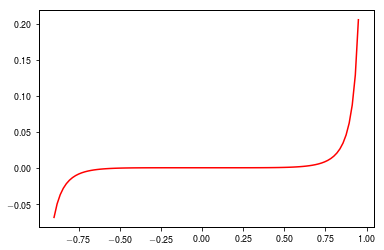

In [25]:
3e8*0.4e-9*1e2

12.000000000000002